In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [4]:
def load_data_and_labels(positive_data_file, negative_data_file, level="char"):
       
    positive_examples = list(open(positive_data_file, "r").readlines())
    negative_examples = list(open(negative_data_file, "r").readlines())
    if level == "char":
        positive_examples = [s.replace(" ", "").replace("", " ") for s in positive_examples]
        negative_examples = [s.replace(" ", "").replace("", " ") for s in negative_examples]
    elif level == "word":
        positive_examples = [s.strip() for s in positive_examples]
        negative_examples = [s.strip() for s in negative_examples]
    else:
        print("invaid value of 'level'. ('char' or 'word') ")
        
    x_text = positive_examples + negative_examples

    positive_labels = [[0, 1] for _ in positive_examples]
    negative_labels = [[1, 0] for _ in negative_examples]
    y = np.concatenate([positive_labels, negative_labels], 0)
    
    return x_text, y

In [5]:
positive_data_file = "data/amazon/book_pos.txt"
negative_data_file = "data/amazon/book_neg.txt"

In [6]:
%%notify
x_text, y = load_data_and_labels(positive_data_file, negative_data_file)

<IPython.core.display.Javascript object>

In [7]:
len(x_text)

1000000

In [8]:
assert len(x_text) == len(y)

In [9]:
x_text[0]

' L o v e t h e c h a r a c t e r s . L o v e t h e l o c a t i o n ! I c a n n o t w a i t f o r t h e n e x t b o o k i n t h e s e r i e s . I w i l l c e r t a i n l y r e a d i t . \n '

In [10]:
length_list = np.array([len(r)for r in x_text])

In [11]:
df = pd.DataFrame(length_list, columns=["length"])
df.head()

,length
0,187
1,399
2,621
3,215
4,225


In [12]:
df.describe()

,length
count,1000000.000000
mean,842.351232
std,1119.140102
min,3.000000
25%,255.000000
50%,447.000000
75%,931.000000
max,48939.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c377b4f60>]],
      dtype=object)

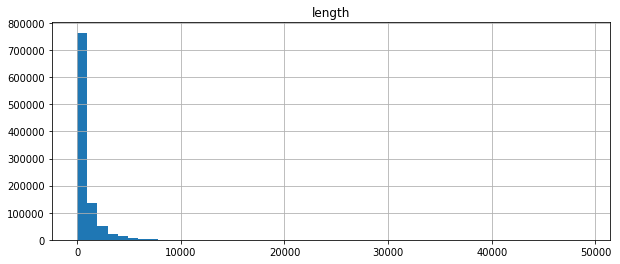

In [13]:
df.hist(bins=50,figsize=(10,4))

In [18]:
len(df[df["length"] > 1000].index)

230731

In [21]:
def get_ratio(max_length):
    return len(df[df["length"] > max_length].index)/len(df.index)
get_ratio(1000)

0.230731

In [22]:
get_ratio(2000)

0.096341

In [23]:
get_ratio(3000)

0.047589